In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as nsn  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf

In [3]:
df = pd.read_csv("Pearson.txt")
df = df.drop_duplicates()
print(df.head())

  Father\tSon
0  65.0\t59.8
1  63.3\t63.2
2  65.0\t63.3
3  65.8\t62.8
4  61.1\t64.3


In [4]:
new = df['Father\tSon'].str.split('\t', expand = True)

In [5]:
new.columns = ['Fathers', 'Son']
new

,Fathers,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1072,67.7,59.8
1073,67.0,70.8
1075,71.8,69.3
1076,70.7,69.3


In [6]:
new_1 = new.copy().astype(float)
mean=new_1.mean()
std_dev=new_1.std()
print(mean)
print(std_dev)

Fathers    67.673861
Son        68.672871
dtype: float64
Fathers    2.791096
Son        2.866255
dtype: float64


In [7]:
new_1['Result'] = new_1["Fathers"].div(new_1["Son"].values)
new_1

,Fathers,Son,Result
0,65.0,59.8,1.086957
1,63.3,63.2,1.001582
2,65.0,63.3,1.026856
3,65.8,62.8,1.047771
4,61.1,64.3,0.950233
...,...,...,...
1072,67.7,59.8,1.132107
1073,67.0,70.8,0.946328
1075,71.8,69.3,1.036075
1076,70.7,69.3,1.020202


In [8]:
new_1.isnull().sum()

Fathers    0
Son        0
Result     0
dtype: int64

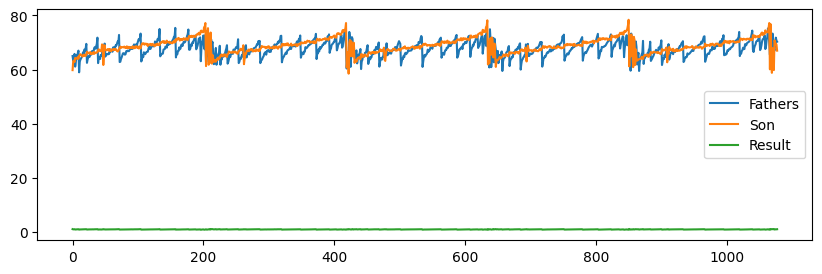

In [9]:
plt.figure(figsize=(10,3))
plt.plot(new_1)
plt.legend(['Fathers', 'Son','Result'], loc='right')

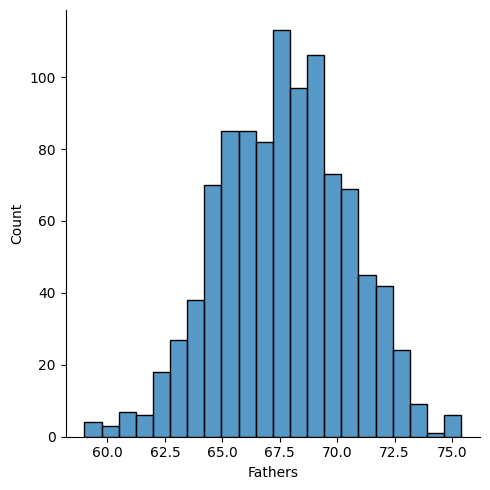

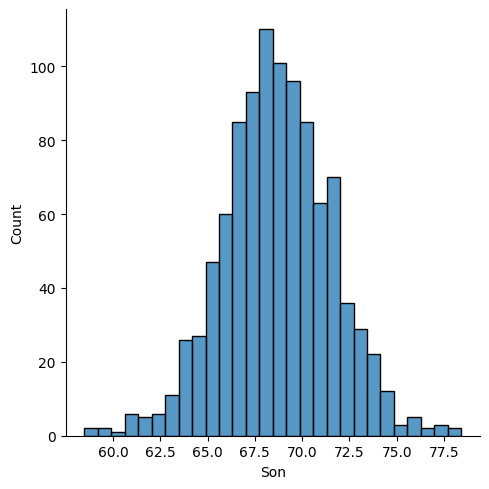

In [10]:
nsn.displot(new_1['Fathers'])
nsn.displot(new_1['Son'])

<function matplotlib.pyplot.show(close=None, block=None)>

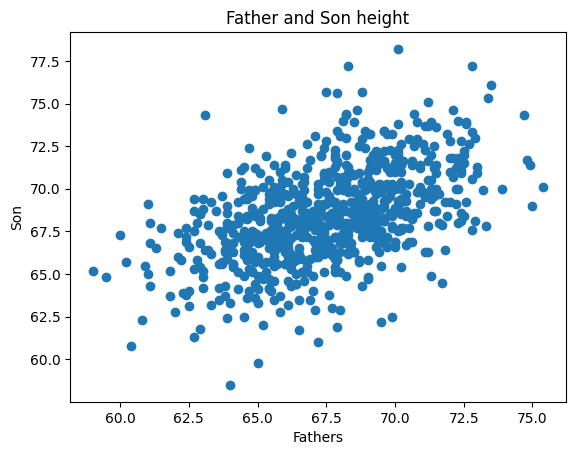

In [11]:
#visulize 
data = np.loadtxt('Pearson.txt', delimiter='\t', skiprows=1)

# num_points = int(len(data) *0.7)
# indices = np.random.choice(len(data), num_points, replace=False)
# data_70percent = data[indices]

num_samples = int(0.7 * len(data))
data = data[:num_samples]

fig, ax = plt.subplots()

ax.scatter (data[:,0], data[:,1])
ax.set_xlabel('Fathers')
ax.set_ylabel('Son')
ax.set_title('Father and Son height')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

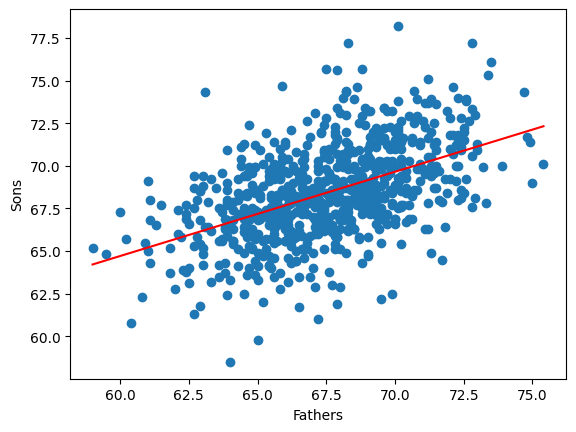

In [12]:
data = np.loadtxt('Pearson.txt', delimiter='\t', skiprows= 1)

num_samples = int(0.7 * len(data))
data = data[:num_samples]

x = data[:,0]
y = data[:,1]

slope = (np.mean(x*y) - np.mean(x)*np.mean(y)) / (np.mean(x**2) - np.mean(x)**2) 
intercept = np.mean(y) - slope*np.mean(x)

x0 = np.array([min(x), max(x)])
y0 = intercept + slope*x0

plt.scatter(x, y)
plt.plot(x0, y0, c='red')

plt.xlabel('Fathers')
plt.ylabel('Sons')

plt.show

In [13]:
x_new = np.array([70, 70.3])
y_pred = intercept + x_new*slope
print(y_pred)

[69.64976757 69.79803331]


In [14]:
data = np.loadtxt('Pearson.txt', delimiter='\t', skiprows=1)

num_samples = int(0.7 * len(data))
train_data = data[:num_samples]

num_test = int(0.3*len(data))
test_data = data[num_samples:]

x_test = test_data[:,0]
y_test = test_data[:,1]

slope = (np.mean(x_test*y_test) - np.mean(x_test)*np.mean(y_test)) / (np.mean(x_test**2) - np.mean(x_test)**2) 
intercept = np.mean(y_test) - slope*np.mean(x_test)

x_new2 = np.array([69.9, 70.3])
y_test = intercept + slope*x_new2
print(y_test)

[70.24862624 70.45927207]


In [15]:
# Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results  
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.6300487138306039
Mean Squared Error (MSE): 0.39793420056860807
Root Mean Squared Error (RMSE): 0.6308202601126632
R-squared (R^2): -34.872821664767926


In [16]:
import numpy as np
from scipy import stats

# Load the data
data = np.loadtxt('Pearson.txt', delimiter='\t', skiprows=1)

# Split the data into training and test sets
num_samples = int(0.7 * len(data))
train_data = data[:num_samples]

num_test = int(0.3 * len(data))
test_data = data[num_samples:]

# Extract x and y from test data
x_test = test_data[:, 0]
y_test = test_data[:, 1]

# Calculate the slope and intercept using the formulas provided
slope = (np.mean(x_test * y_test) - np.mean(x_test) * np.mean(y_test)) / (np.mean(x_test**2) - np.mean(x_test)**2)
intercept = np.mean(y_test) - slope * np.mean(x_test)

# New x values for prediction
x_new2 = np.array([70, 70.3])
# Calculate predicted y values
y_predicted = intercept + slope * x_new2

# To calculate the test statistic, we'll perform a linear regression and then calculate the t-statistic and p-value
# Perform linear regression on test data
slope, intercept, r_value, p_value, std_err = stats.linregress(x_test, y_test)

# Calculate the t-statistic for the slope (beta coefficient)
t_statistic = slope / std_err

# The degrees of freedom for the test statistic
df = len(x_test) - 2

# Calculate the p-value for the t-statistic
p_value = stats.t.sf(np.abs(t_statistic), df) * 2  # two-sided pvalue = Prob(abs(t)>tt)

y_predicted, t_statistic, p_value, r_value**2

(array([70.3012877 , 70.45927207]),
 9.898793785556949,
 2.417584532395401e-20,
 0.2333079930836247)